# Pyhton Web-Scraping from a Dynamic Website

In this notebook, we will learn how to scrape some data from a dynamic website. In dynamic web pages, the Content of pages is different for different visitors. It takes more time to load than the static web page. Dynamic web pages are used where the information is changed frequently, for example, stock prices, weather information, etc

We use requests to load page into our python script. Now, if the page we are trying to load is dynamic in nature and we request this page by requests library, it would send the JS code to be executed locally. Requests package does not execute this JS code and just gives it as the page source. For that we use selenium package.

references: https://www.geeksforgeeks.org/difference-between-static-and-dynamic-web-pages/
https://www.geeksforgeeks.org/scrape-content-from-dynamic-websites/

 
#### Required Libraries:
 
 > requests -  this module allows user to send HTTP requests using Python and to get the response text.
 
 > Selenium:  Selenium  (open-source) is a web testing library. It is used to automate browser activities.
 
 > bs4 - Beautiful Soup is a Python package for parsing HTML and XML documents. It creates parse trees that is helpful to extract the data easily.
 
 > pandas - to store the data in a structured format
 
 > Selenium webdriver - need to download selenium webdriver. The webdriver will run in real time and interact with the webpage to get the data.
 

### URL That We want to scrape

In this Jupyter Notebook, we will scrape some laptop details from flipkart website  'https://www.flipkart.com/'. The data includes Product Name, Specs_summary, Price, rating.

This is only for educational purpose.


Reference : https://realpython.com/beautiful-soup-web-scraper-python/

Steps: 
    
    1)  Launch Selenium webdriver
    
    2)  Go the the flipkart website. Let it load. 
    
    3) Once loaded, Enter "Laptop" in the search box. (navigate to searchbox using inspect element). Then press enter.
    
    4) Let the search result load completely.
    
    5) Once loaded, using requests, get html data. 
    
    6) using BeautifulSoup parse the required info like product name, rating, price, specification etc.
    
    7) Go to next page. (By clicking on next button using webdriver)
    
    8) Repeat steps 5, 6 & 7 until required number of products reached.

In [178]:
base_url = 'https://www.flipkart.com/'

### Selecting the information that we want to scrape

We would be getting the data which include Product name, price, rating, product specs

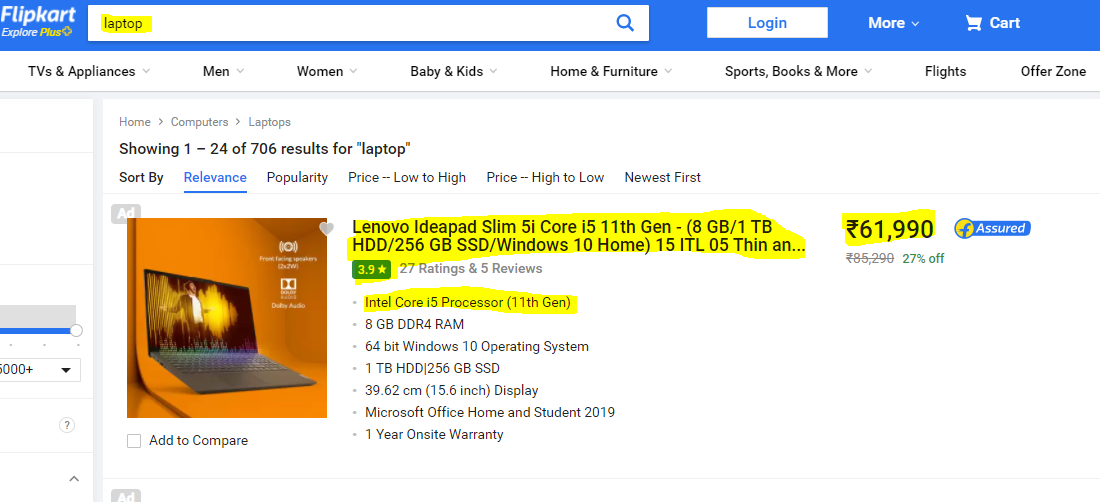

Hence we define our column names as below:

In [310]:
column_names = ['Sr_No',  'product_name', 'product_url', 'rating', 'price', 'spec', 'category_labels', 'summary', 'full_article', 'sources']

### Inspecting the page for parsing

This is basically to tell the bs4 paser where (which tag) the data exists on the webpage. 

Right click on the webpage and click inspect. or Simply press F12.

### inspect element for search box

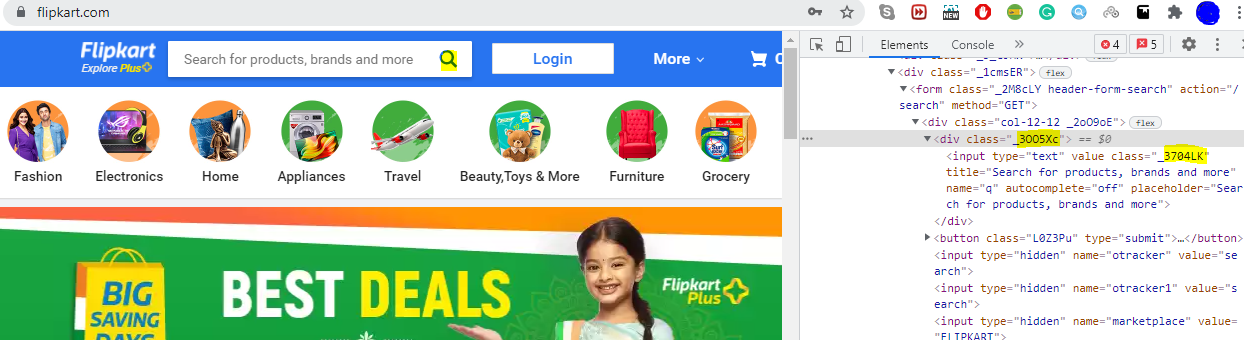

### inspect element for lapto details

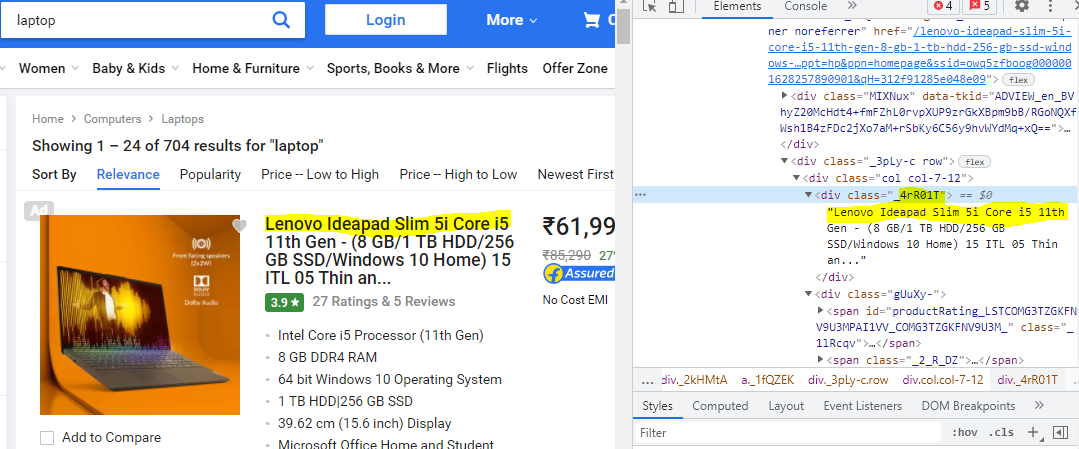

### inspect element for price

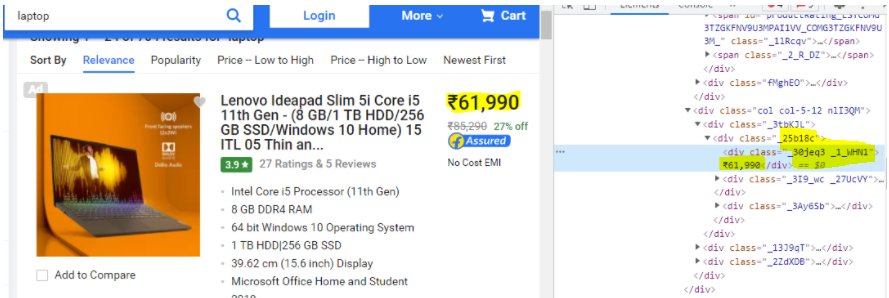

### inspect element for rating

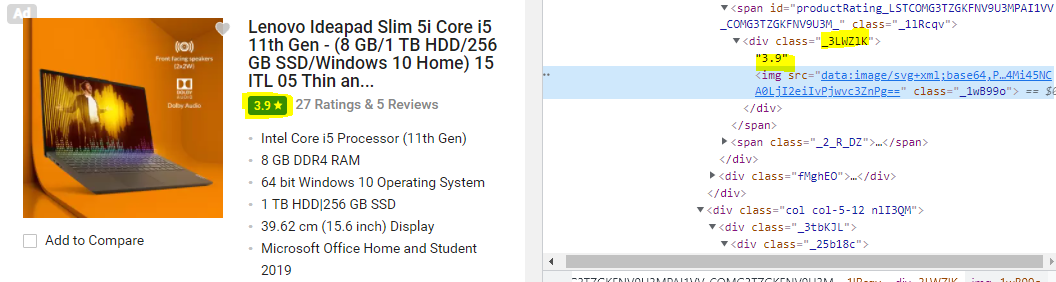

### inspect element for spec

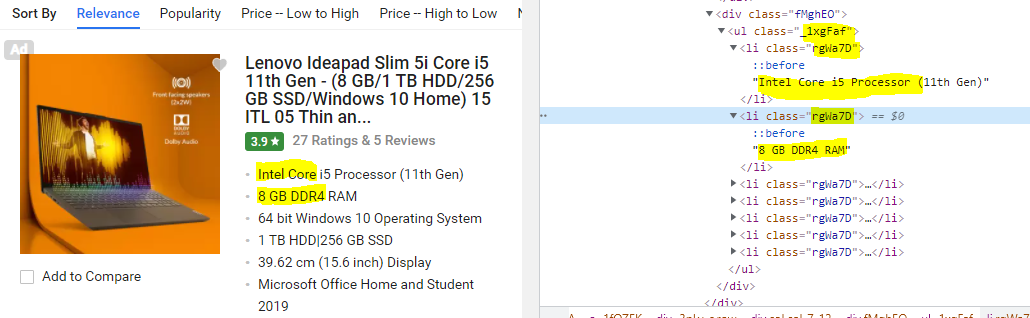

### inspect element for next button

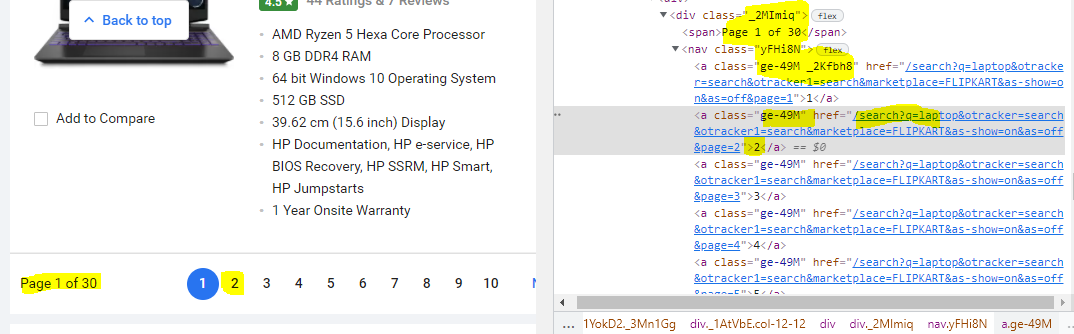

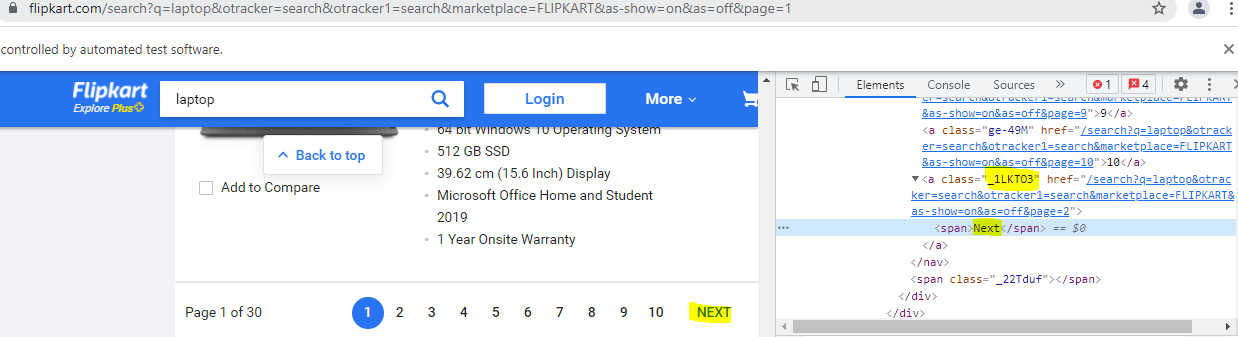

We have covered all the required elements

# Importing Libraries

In [179]:
import requests
import bs4
import pandas as pd
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

We need to download chrome driver. Below is the link to download the chrome driver. Please download compatible version

https://chromedriver.chromium.org/downloads

### Loading the website

In [180]:
#webdriver path. The path where the chromedriver is stored in the system
base_url = 'https://www.flipkart.com/'
chrome_path = 'G:\softwares\chromedriver_win32\chromedriver'
driver = webdriver.Chrome(executable_path=chrome_path)
driver.get(base_url)

It will open the website, but once it is loaded, it will also open the login window. We need to close the login window.
To do that below is the inspect element of the close button of the login window.

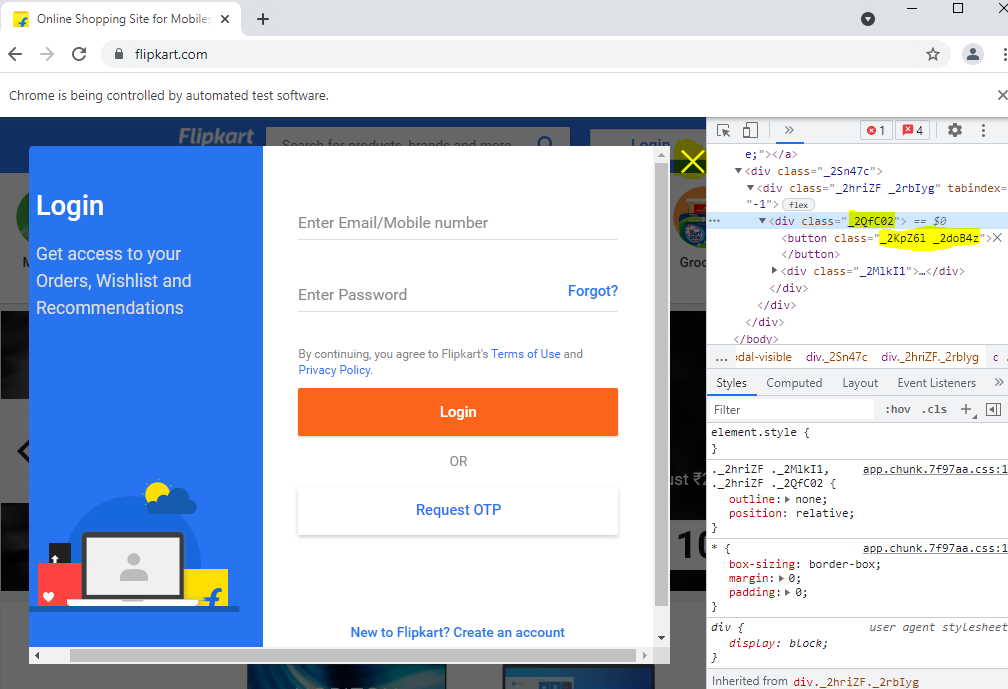

In [181]:
#https://stackoverflow.com/questions/43021434/click-button-by-find-element-by-class-name-not-working-python-selenium-webdriver/43024383
driver.find_element_by_xpath("//button[@class='_2KpZ6l _2doB4z']").click()

### Entering the "Laptop" in the search box

In [57]:
#entering the laptop keyword
driver.find_element_by_class_name("_3704LK").send_keys("laptop")


In [58]:
#submitting the keyword
driver.find_element_by_xpath("//button[@class='L0Z3Pu']").submit()

In [60]:
#let the page load
time.sleep(2)

In [59]:
#get the page source. This way the server will send the complete webpage data to user
page_source = driver.page_source 

In [61]:
#parsing the data
soup = bs4.BeautifulSoup(page_source, 'html.parser')

In [67]:
#total number of search results
total_search_results = soup.find_all('span',attrs={'class':'_10Ermr'})
print("total search results are ", total_search_results[0].text.split("of")[1].split()[0])

total search results are  697


In [ ]:
#getting the all the products' portfolio of a page

In [159]:
portfolio = soup.find_all('div',attrs={'class':'_2kHMtA'})
len(portfolio)

24

there are total 24 products on this page

In [158]:
# getting required inforamtion from the first product

product_name_finder = portfolio[0].find_all('div',attrs={'class':'_4rR01T'})
price_finder = portfolio[0].find_all('div',attrs={'class':'_30jeq3 _1_WHN1'})
rating_finder = portfolio[0].find_all('div',attrs={'class':'_3LWZlK'})
spec_finder = portfolio[0].find_all('ul',attrs={'class':'_1xgFaf'})
url_finder = portfolio[0].find_all('a',attrs={'class':'_1fQZEK'})


if len(product_name_finder)!=0:
    print(product_name_finder[0].text)
if len(price_finder)!=0:
    print(price_finder[0].text)
if len(rating_finder)!=0:
    print(rating_finder[0].text)
if len(spec_finder)!=0:
    print(spec_finder[0].text)
if len(url_finder)!=0:
    print("https://www.flipkart.com" + url.get('href'))

MSI Core i7 8th Gen - (16 GB/1 TB HDD/256 GB SSD/Windows 10 Home/6 GB Graphics/NVIDIA GeForce RTX 2060...
₹1,58,990
NVIDIA GeForce RTX 2060Intel Core i7 Processor (8th Gen)16 GB DDR4 RAM64 bit Windows 10 Operating System1 TB HDD|256 GB SSD43.94 cm (17.3 inch) DisplayKiller DoubleShot Pro, Dragon Center 2.0, Cooler Boost 5, Nahimic 32 Years Carry In Warranty
https://www.flipkart.com/lenovo-ideapad-gaming-3-core-i5-10th-gen-8-gb-512-gb-ssd-windows-10-home-4-graphics-nvidia-geforce-gtx-1650-120-hz-15imh05-laptop/p/itm4a57ee3f8c23a?pid=COMG36BSJWHQDN68&lid=LSTCOMG36BSJWHQDN68EVP47U&marketplace=FLIPKART&q=laptop&store=6bo%2Fb5g&srno=s_1_24&otracker=search&otracker1=search&fm=SEARCH&iid=en_aB1Pa9jKnrt8Z8b1MmpWX37%2F0TJqdYPKDgp1vCQQT9ThSJIADsYCf1df42%2FMzLk22ka606sFmJsDt%2F7J8ey6Gw%3D%3D&ppt=sp&ppn=sp&ssid=cla19vfl0g0000001628259722294&qH=312f91285e048e09


In [160]:
# getting required inforamtion from first 5 products

for i in range(5):
    
    print("*********",i)

    product_name_finder = portfolio[i].find_all('div',attrs={'class':'_4rR01T'})
    price_finder = portfolio[i].find_all('div',attrs={'class':'_30jeq3 _1_WHN1'})
    rating_finder = portfolio[i].find_all('div',attrs={'class':'_3LWZlK'})
    spec_finder = portfolio[i].find_all('ul',attrs={'class':'_1xgFaf'})
    url_finder = portfolio[i].find_all('a',attrs={'class':'_1fQZEK'})


    if len(product_name_finder)!=0:
        print(product_name_finder[0].text)
    if len(price_finder)!=0:
        print(price_finder[0].text)
    if len(rating_finder)!=0:
        print(rating_finder[0].text)
    if len(spec_finder)!=0:
        print(spec_finder[0].text)
    if len(url_finder)!=0:
        print("https://www.flipkart.com" + url.get('href'))

********* 0
MSI Core i7 8th Gen - (16 GB/1 TB HDD/256 GB SSD/Windows 10 Home/6 GB Graphics/NVIDIA GeForce RTX 2060...
₹1,58,990
NVIDIA GeForce RTX 2060Intel Core i7 Processor (8th Gen)16 GB DDR4 RAM64 bit Windows 10 Operating System1 TB HDD|256 GB SSD43.94 cm (17.3 inch) DisplayKiller DoubleShot Pro, Dragon Center 2.0, Cooler Boost 5, Nahimic 32 Years Carry In Warranty
https://www.flipkart.com/lenovo-ideapad-gaming-3-core-i5-10th-gen-8-gb-512-gb-ssd-windows-10-home-4-graphics-nvidia-geforce-gtx-1650-120-hz-15imh05-laptop/p/itm4a57ee3f8c23a?pid=COMG36BSJWHQDN68&lid=LSTCOMG36BSJWHQDN68EVP47U&marketplace=FLIPKART&q=laptop&store=6bo%2Fb5g&srno=s_1_24&otracker=search&otracker1=search&fm=SEARCH&iid=en_aB1Pa9jKnrt8Z8b1MmpWX37%2F0TJqdYPKDgp1vCQQT9ThSJIADsYCf1df42%2FMzLk22ka606sFmJsDt%2F7J8ey6Gw%3D%3D&ppt=sp&ppn=sp&ssid=cla19vfl0g0000001628259722294&qH=312f91285e048e09
********* 1
MSI Creator 17 Core i7 10th Gen - (32 GB/1 TB SSD/Windows 10 Home/8 GB Graphics/NVIDIA GeForce RTX 207...
₹2,64,990

### Clicking on the next button to load the next page

In [135]:
#driver.find_element_by_class_name("//button[@class='_1LKTO3]").click()
driver.find_elements_by_class_name("_1LKTO3")


[<selenium.webdriver.remote.webelement.WebElement (session="13c8ec4d5943184e343a2aa13a59979e", element="f52087f2-3a38-4ba7-9c19-2498d8d943c4")>,
 <selenium.webdriver.remote.webelement.WebElement (session="13c8ec4d5943184e343a2aa13a59979e", element="75fc814e-0a4e-46c2-babf-7386e6b4e26c")>]

In [130]:
driver.find_element_by_class_name("yFHi8N").click()

In [82]:
#let it load
time.sleep(2)

Now we need to parse the data from this page also like we did in previous steps for the first page

### Putting it all together

In [173]:
import requests
import bs4
import pandas as pd
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC


column_names = ['Sr_No',  'product_name',  'rating', 'price', 'spec','product_url']
df = pd.DataFrame(columns = column_names)

k = 0

base_url = 'https://www.flipkart.com/'
chrome_path = 'G:\softwares\chromedriver_win32\chromedriver'
driver = webdriver.Chrome(executable_path=chrome_path)
driver.get(base_url)

#let the page load
time.sleep(2)

#closing the login window
driver.find_element_by_xpath("//button[@class='_2KpZ6l _2doB4z']").click()

#entering the laptop keyword
driver.find_element_by_class_name("_3704LK").send_keys("laptop")

#submitting the keyword
driver.find_element_by_xpath("//button[@class='L0Z3Pu']").submit()

#let the page load
time.sleep(10)


#get the page source. This way the server will send the complete webpage data to user
page_source = driver.page_source 

#parsing the data
soup = bs4.BeautifulSoup(page_source, 'html.parser')

#total number of search results

total_search_results = soup.find_all('span',attrs={'class':'_10Ermr'})
total_products = int(total_search_results[0].text.split("of")[1].split()[0])
print("total search results are ", total_products)
j= 0    

while True:
    
    print("Scraping page number ", j)
    if j==0:
        page_source = driver.page_source 
        time.sleep(10)
        soup = bs4.BeautifulSoup(page_source, 'html.parser')
    
    else:   #untill we have the next button available
        #clicking on the next button
        if j==1:
            next_page_number = 0
        elif len(driver.find_elements_by_class_name("_1LKTO3"))==2:
            next_page_number = 1
        else:
            break
            
        driver.find_elements_by_class_name("_1LKTO3")[next_page_number].click()
        time.sleep(2)
        page_source = driver.page_source 
        time.sleep(10)
        soup = bs4.BeautifulSoup(page_source, 'html.parser')

        
        

    j+=1
    
    #getting the product portfolios of each page
    portfolio = soup.find_all('div',attrs={'class':'_2kHMtA'})


    for i in range(len(portfolio)):
        #getting the required data

        product_name_finder = portfolio[i].find_all('div',attrs={'class':'_4rR01T'})
        price_finder = portfolio[i].find_all('div',attrs={'class':'_30jeq3 _1_WHN1'})
        rating_finder = portfolio[i].find_all('div',attrs={'class':'_3LWZlK'})
        spec_finder = portfolio[i].find_all('ul',attrs={'class':'_1xgFaf'})
        url_finder = portfolio[i].find_all('a',attrs={'class':'_1fQZEK'})


        if len(product_name_finder)!=0:
            product_name = product_name_finder[0].text
        else:
            product_name = "None"
        ######    
        if len(price_finder)!=0:
            price = price_finder[0].text
        else:
            rating = "None"
        ######  
        if len(rating_finder)!=0:
            rating = rating_finder[0].text
        else:
            rating = "None"
        ######   
        if len(spec_finder)!=0:
            spec = spec_finder[0].text
        else:
            spec = "None"
        ######   
        if len(url_finder)!=0:
            product_url = "https://www.flipkart.com" + url.get('href')
        else:
            product_url = "None"



        df = df.append({'Sr_No':k, 
                            'base_url':base_url,
                            'product_name':product_name,
                            'rating':rating,
                            'price':price,                            
                            'spec': spec,
                            'product_url': product_url
                           }, ignore_index=True)
        k+=1
    
    
    

    
    

total search results are  699
Scraping page number  0
Scraping page number  1
Scraping page number  2
Scraping page number  3
Scraping page number  4
Scraping page number  5
Scraping page number  6
Scraping page number  7
Scraping page number  8
Scraping page number  9
Scraping page number  10
Scraping page number  11
Scraping page number  12
Scraping page number  13
Scraping page number  14
Scraping page number  15
Scraping page number  16
Scraping page number  17
Scraping page number  18
Scraping page number  19
Scraping page number  20
Scraping page number  21
Scraping page number  22
Scraping page number  23
Scraping page number  24
Scraping page number  25
Scraping page number  26
Scraping page number  27
Scraping page number  28
Scraping page number  29
Scraping page number  30


In [174]:
df.head()

,Sr_No,product_name,rating,price,spec,product_url,base_url
0,0,ASUS TUF Gaming A17 Ryzen 5 Hexa Core 4600H - ...,4.4,"₹60,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,https://www.flipkart.com/lenovo-ideapad-gaming...,https://www.flipkart.com/
1,1,HP 15s Ryzen 3 Dual Core 3250U - (8 GB/1 TB HD...,4.2,"₹36,490",AMD Ryzen 3 Dual Core Processor8 GB DDR4 RAM64...,https://www.flipkart.com/lenovo-ideapad-gaming...,https://www.flipkart.com/
2,2,ASUS Celeron Dual Core - (4 GB/1 TB HDD/Window...,3.9,"₹23,990",Intel Celeron Dual Core Processor4 GB DDR4 RAM...,https://www.flipkart.com/lenovo-ideapad-gaming...,https://www.flipkart.com/
3,3,HP 15s Core i3 11th Gen - (8 GB/1 TB HDD/Windo...,4.1,"₹41,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,https://www.flipkart.com/lenovo-ideapad-gaming...,https://www.flipkart.com/
4,4,DELL Vostro Core i3 10th Gen - (4 GB/256 GB SS...,4.2,"₹34,990",Intel Core i3 Processor (10th Gen)4 GB DDR4 RA...,https://www.flipkart.com/lenovo-ideapad-gaming...,https://www.flipkart.com/


In [177]:
df.tail()

,Sr_No,product_name,rating,price,spec,product_url,base_url
695,695,ASUS VivoBook Flip 14 Core i5 11th Gen - (8 GB...,3.3,"₹72,990",Intel Core i5 Processor (11th Gen)8 GB LPDDR4X...,https://www.flipkart.com/lenovo-ideapad-gaming...,https://www.flipkart.com/
696,696,HP Ryzen 5 Hexa Core 5500U - (8 GB/512 GB SSD/...,4.6,"₹51,997",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,https://www.flipkart.com/lenovo-ideapad-gaming...,https://www.flipkart.com/
697,697,Lenovo Core i3 10th Gen - (4 GB/256 GB SSD/DOS...,2,"₹37,682",Intel Core i3 Processor (10th Gen)4 GB DDR4 RA...,https://www.flipkart.com/lenovo-ideapad-gaming...,https://www.flipkart.com/
698,698,ASUS Zephyrus G14 Ryzen 9 Octa Core AMD Ryzen™...,None,"₹1,27,990",AMD Ryzen 9 Octa Core Processor (5th Gen)16 GB...,https://www.flipkart.com/lenovo-ideapad-gaming...,https://www.flipkart.com/
699,699,ASUS ROG Zephyrus G14 Ryzen 7 Octa Core Ryzen ...,None,"₹1,05,990",AMD Ryzen 7 Octa Core Processor (4th Gen)16 GB...,https://www.flipkart.com/lenovo-ideapad-gaming...,https://www.flipkart.com/


In [176]:
df.shape

(700, 7)

In [175]:
df.to_excel(r'flipkart products.xlsx', index = True)